<a href="https://colab.research.google.com/github/jwoonge/ML-algorithms/blob/master/04_Logistic_Regression_for_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20141261 송제웅  
# 04 Logistic Regression for Binary Classification


## - function definition
[1] txt file read

In [0]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import math

drive.mount('/content/gdrive')

def read_data(filename):
    data = np.genfromtxt(filename, delimiter=',')
    variables = []
    for i in range(len(data)):
        variables.append([data[i][0], data[i][1]])
    labels = data[:,2]

    return variables,labels

[2] Linear Model
$z = \theta_0 + \theta_1x+\theta_2y$

In [0]:
def linear_func(thetas, variables):
    ret = thetas[0]
    for i in range(len(thetas)-1):
        ret += thetas[i+1] * variables[i]
    return ret

[3] Sigmoid Function $\sigma(z) = \frac{1}{1+exp(-z)}$

In [0]:
def sigmoid(z):
    return 1/(1+np.exp(np.float64(-z)+math.e**(-64)))

[4] Object Function  
$J(\theta_0, \theta_1, \theta_2)=\frac{1}{m} \sum_{i=1}^m{-l_i log(\sigma(z_i))-(1-l_i)log(1-\sigma(z_i))}$

In [0]:
def object_func(thetas, variables, labels):
    m = len(variables)
    ret = 0
    for i in range(m):
        ret += -labels[i] * math.log(sigmoid(linear_func(thetas,variables[i]))+np.exp(-64)) /m
        ret += -(1-labels[i])*math.log(1-(sigmoid(linear_func(thetas,variables[i])))+np.exp(-64)) /m
    return ret

[5] Gradient Descent  
$\theta_0(t+1)=\theta_0(t)-\alpha\frac{1}{m}\sum_{i=1}^m{(\sigma(z_i)-l_i)}$  
$\theta_1(t+1)=\theta_1(t)-\alpha\frac{1}{m}\sum_{i=1}^m{(\sigma(z_i)-l_i)x_i}$  
$\theta_2(t+1)=\theta_2(t)-\alpha\frac{1}{m}\sum_{i=1}^m{(\sigma(z_i)-l_i)y_i}$


In [0]:
def gradient_descent(thetas, variables, labels, learning_rate):
    thetas_new = []
    m = len(variables)
    for i in range(len(thetas)):
        update = 0
        for j in range(m):
            if i==0:
                mult=1
            else:
                mult = variables[j][i-1]
            update += (sigmoid(linear_func(thetas,variables[j]))-labels[j])*mult/m
        thetas_new.append(thetas[i]-learning_rate*update)
    return thetas_new

[6] : 종료 조건인 convergence함을 판별하기 위한 boolean 함수  
theta 값 두 가지의 변동률이 convergence rate 보다 작아지면 convergence로 판별한다

In [0]:
def convergence(thetas_last, thetas_new, convergence_rate = 0.00000001):
    count = 0
    for i in range(len(thetas_last)):
        rate = np.abs((thetas_new[i]+math.e**(-64) - thetas_last[i])/(thetas_last[i]+math.e**(-64)))
        if rate <= convergence_rate:
            count += 1
    if count == len(thetas_last):
        return True
    else:
        return False

## - Main

txt file 의 데이터를 읽어온다

In [0]:
variables, labels = read_data('gdrive/My Drive/Colab Notebooks/ML assignments/04/data.txt')

반복문을 위한 초기 조건 설정
$\theta_0, \theta_1, \theta_2$는 각각 -10부터 gradient descent (func[5])를 실행

In [31]:
t=0
thetas = [[-10,-10,-10]]
error_train = [object_func(thetas[t],variables,labels)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


gradient descent로 optimization을 하는 반복문  
1회의 반복이 한 번의 최적화 단계가 된다.  
convergence (func[6])하게 되면 중지한다.

In [0]:
while True:
    thetas_new = gradient_descent(thetas[t], variables, labels, 0.003)
    thetas.append(thetas_new)
    t+= 1
    error_train.append(object_func(thetas[t], variables, labels))
    if (t%10000)==0:
        print(t, thetas_new, error_train[-1])
    if convergence(thetas[t-1], thetas[t]):
        break
min_t = error_train.index(min(error_train))
opt_thetas = thetas[min_t]

## - Result
[1] Plot the training data

*   plot the training data points (x,y) with their labels $l$ in colors (blue for label 0 and red for label 1)



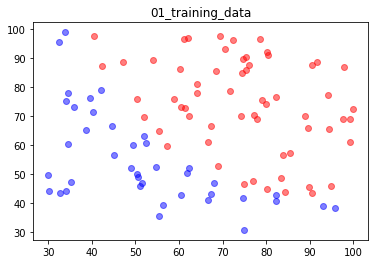

In [37]:
plt.title("01_training_data")
x_label0 = []
y_label0 = []
x_label1 = []
y_label1 = []
for i in range(len(variables)):
    if labels[i]==0:
        x_label0.append(variables[i][0])
        y_label0.append(variables[i][1])
    else:
        x_label1.append(variables[i][0])
        y_label1.append(variables[i][1])
plt.scatter(x_label0, y_label0,alpha=0.5, c='b')
plt.scatter(x_label1, y_label1,alpha=0.5, c='r')
plt.show()

[2] Plot the estimated parameters
*   plot the estimated parameters ($\theta_0, \theta_1, \theta_2$) at every iteration of gradient descent until convergence
*   the colors for the parameters ($\theta_0, \theta_1, \theta_2$) should be red, green, blue, respectively

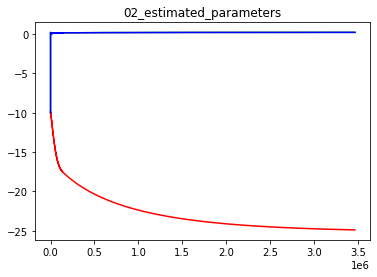

In [38]:
plt.title("02_estimated_parameters")
thetas = np.transpose(thetas)
plt.plot(thetas[0], c='r')
plt.plot(thetas[1], c='g')
plt.plot(thetas[2], c='b')
plt.show()

[3] Plot the training error
*   plot the training error $J(\theta_0, \theta_1, \theta_2)$ at every iteration of gradient descent until convergence (in blue color)

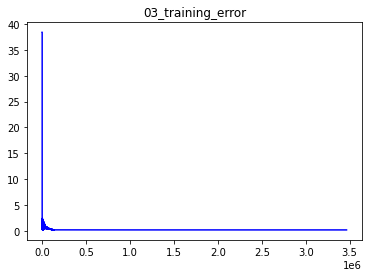

In [39]:
plt.title("03_training_error")
plt.plot(error_train, c='b')
plt.show()


[4] Plot the obtained classifier

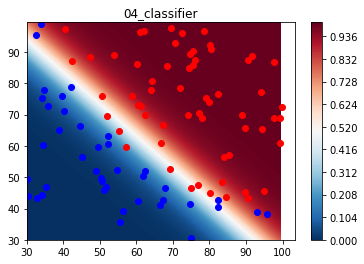

In [41]:
plt.title("04_classifier")
x_range = np.arange(30,100,0.5)
y_range = np.arange(30,100,0.5)
x_range,y_range = np.meshgrid(x_range,y_range)
classified = sigmoid(linear_func(opt_thetas,[x_range,y_range]))
plt.contourf(x_range,y_range,classified, 300, cmap='RdBu_r',zorder=1, vmax=1, vmin=0)
plt.colorbar()
plt.scatter(x_label0, y_label0,alpha=1, c='b',zorder=2)
plt.scatter(x_label1, y_label1,alpha=1, c='r',zorder=2)
plt.show()